# Understanding and Predicting Customer Churn

#### **Objectives:**
1. To understand what factors contributed most to customer churn.
2. To perform clustering to find any meaningful patterns of customer traits.
3. To create a model that predicts the likelihood if a certain customer will churn the company or not. 
4. To create or improve different retention strategies on targeted customers. 
5. The implementation of this model will allow management to create better decision-making actions.

#### I'll be covering:
1. Descriptive Analytics - What happened?
2. Predictive Analytics - What might happen?
3. Prescriptive Analytics - What should the company do?

### The Problem:

One of the most common problems at work is **customer churn.** Customer churn is the percentage of customers that stopped using your company's product or service during a certain time frame. You may be wondering why it's necessary to calculate churn rate. Well, it's important because it costs more to acquire new customers than it does to retain existing customers. In fact, an increase in customer retention of just 5% can create at least a 25% increase in profit. This is because returning customers will likely spend 67% more on your company's products and services. As a result, your company can spend less on the operating costs of having to acquire new customers. You don't need to spend time and money on convincing an existing customer to select your company over competitors because they've already made that decision.

Remember, the steps to calculate churn rate are:

1. Determine a time period.
2. Determine the number of customers acquired in this time period. 
3. Determine the number of customers lost or churned in this time period. 
4. Divide the number of lost customers by the number of acquired customers.
5. Multiply that number by 100%.

Customer Churn Rate = (Lost Customers ÷ Acquired Customers) x 100%

Customer Churn Rate = (50 ÷ 500) x 100%

Customer Churn Rate = (0.10) x 100%

Customer Churn Rate = 10%


#### About the dataset
This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.



The dataset includes information about:

- **Customers who left within the last month – the column is called Churn**
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

### Import Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import interp
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn import metrics, model_selection
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
%matplotlib inline

### Load Data

In [3]:
churn_df = pd.read_csv(r"C:\Users\Ishant\Desktop\Data_files\churn_new_data.csv")
churn_df= churn_df.drop(["area_code", "phone_number"], axis=1) # arbitrary features
churn_df.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [4]:
churn_df_features= churn_df.drop(["class"], axis=1)
churn_target=churn_df["class"]

### Data Quality Check

In [153]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
state                            5000 non-null int64
account_length                   5000 non-null int64
international_plan               5000 non-null int64
voice_mail_plan                  5000 non-null int64
number_vmail_messages            5000 non-null int64
total_day_minutes                5000 non-null float64
total_day_calls                  5000 non-null int64
total_day_charge                 5000 non-null float64
total_eve_minutes                5000 non-null float64
total_eve_calls                  5000 non-null int64
total_eve_charge                 5000 non-null float64
total_night_minutes              5000 non-null float64
total_night_calls                5000 non-null int64
total_night_charge               5000 non-null float64
total_intl_minutes               5000 non-null float64
total_intl_calls                 5000 non-null int64
total_intl_charge              

In [154]:
churn_df.isnull().any()

state                            False
account_length                   False
international_plan               False
voice_mail_plan                  False
number_vmail_messages            False
total_day_minutes                False
total_day_calls                  False
total_day_charge                 False
total_eve_minutes                False
total_eve_calls                  False
total_eve_charge                 False
total_night_minutes              False
total_night_calls                False
total_night_charge               False
total_intl_minutes               False
total_intl_calls                 False
total_intl_charge                False
number_customer_service_calls    False
class                            False
dtype: bool

In [155]:
churn_df.dtypes

state                              int64
account_length                     int64
international_plan                 int64
voice_mail_plan                    int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
class                              int64
dtype: object

### Exploratory Data Analysis

In [156]:
churn_df_features.describe()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,14.80348,39.69456,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,0.00000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,26.00000,100.00000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,39.00000,127.00000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,50.00000,243.00000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000261919B7518>,
      dtype=object)

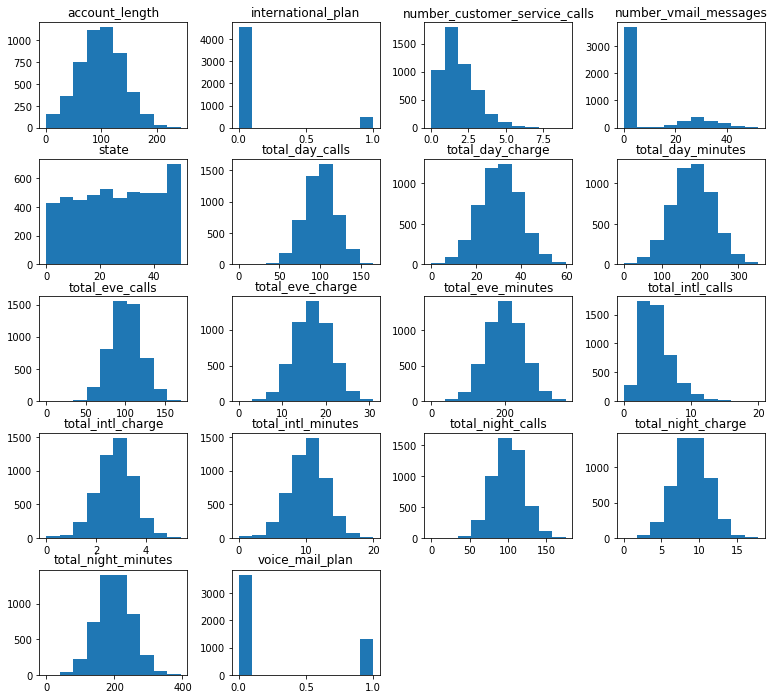

In [157]:
churn_df_features.hist(figsize=(13,12), grid=False)

In [158]:
churn_summary= churn_df.groupby(["class"])
churn_summary.mean()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
class,,,,,,,,,,,,,,,,,,
0,25.956674,99.917074,0.063825,0.284416,8.291870,175.746564,99.899604,29.877494,198.805031,100.241556,16.898654,199.455113,99.975775,8.975593,10.190869,4.481947,2.752055,1.457722
1,26.251768,102.332390,0.281471,0.144272,4.496464,207.870580,100.817539,35.338416,211.757850,99.884017,17.999562,206.078218,99.575672,9.273607,10.692362,4.151344,2.887426,2.254597


In [159]:
churn_summary.std()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
class,,,,,,,,,,,,,,,,,,
0,14.897193,39.737531,0.244469,0.451189,13.809408,49.634575,19.674019,8.437810,50.151854,19.862391,4.262900,50.609570,19.958820,2.277438,2.749994,2.438233,0.742443,1.164236
1,14.228766,39.396993,0.450035,0.351614,11.297719,68.576475,20.757110,11.658195,51.568859,19.618258,4.383293,49.685763,19.968555,2.235902,2.793187,2.550011,0.754057,1.815956


## Class Imbalance

#### Customer Churn Rate: 14%

In [160]:
churn_rate= churn_df["class"].value_counts()/5000
churn_rate

0    0.8586
1    0.1414
Name: class, dtype: float64

Text(0.5, 1, 'Heatmap of correlational matrix')

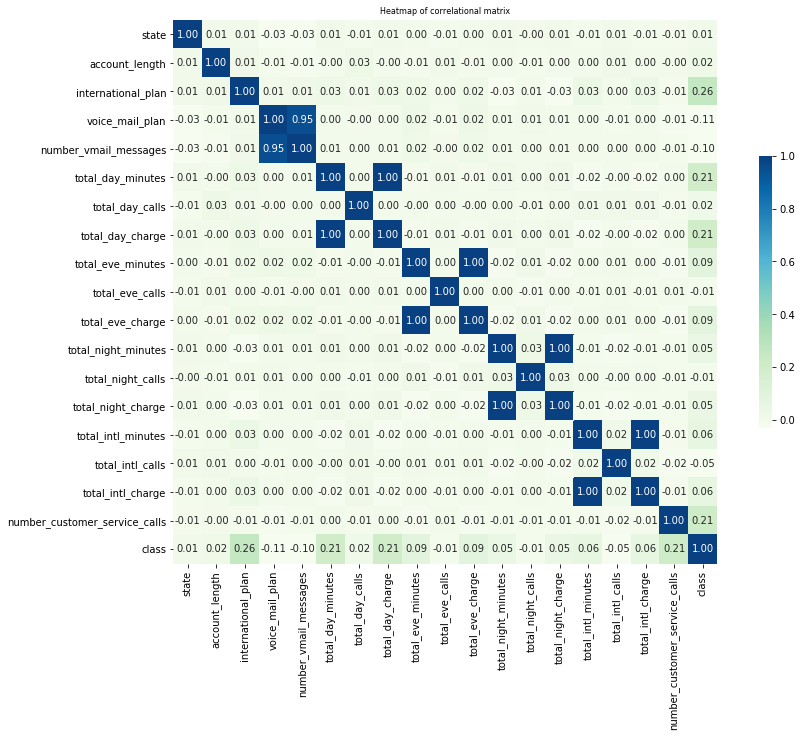

In [161]:
plt.figure(figsize=(15,10))
corr=churn_df.corr()
sns.heatmap(corr, vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='GnBu',
    cbar_kws={"shrink": .5},
    robust=True)
plt.title("Heatmap of correlational matrix", fontsize=8)

The result of this Correlation Matrix means that there isn't much redundant or superfluous data in our dataset. We can see that the variables such as 'voice_mail_plan', 'number_vmail_messages', different minutes cols and charges are highly correlated. I'll still leave all features in for the purposes of this exercise.

The features such as "number_customer_service_calls", "total_day_charge", "total_day_minutes","international_plans" and "voice_plan" show slight correlation with class lets see their pattern towards class.

### --Relevance of number_customer_service_calls on Churn
**Intuitions and forward plan:**
As per my understanding customer who wants to churn should call the customer service before churning.

Text(0, 0.5, '% of number_customer_service_calls')

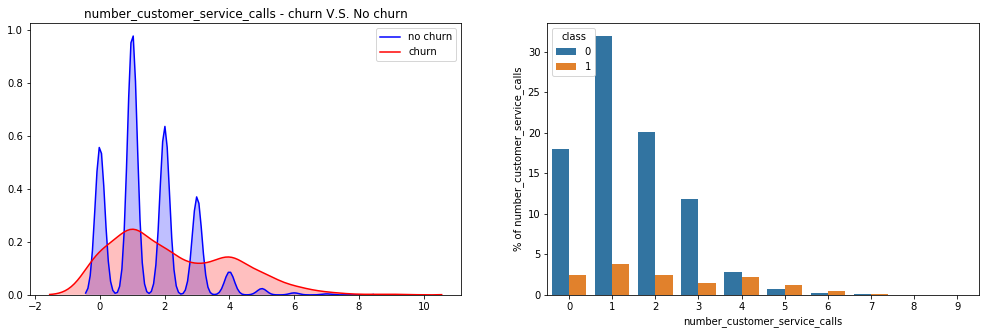

In [162]:
fig = plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
ax=sns.kdeplot (churn_df.loc[(churn_df['class'] == 0),'number_customer_service_calls'] , color='b',shade=True, label='no churn')
ax=sns.kdeplot(churn_df.loc[(churn_df['class'] == 1),'number_customer_service_calls'] , color='r',shade=True, label='churn')
plt.title('number_customer_service_calls - churn V.S. No churn')
plt.subplot(1,2,2)
ax = sns.barplot(x="number_customer_service_calls", y="number_customer_service_calls",
                 hue="class", data=churn_df, estimator=lambda x: len(x) / len(churn_df) * 100)
plt.ylabel("% of number_customer_service_calls")

**Observation:** Customers who called the company more than 3 times are more likely to Churn.

### --Relation b/w total_day_charge and customer churn

Text(0.5, 1.0, "Mean_total_day_charge - churn V.S. No churn'")

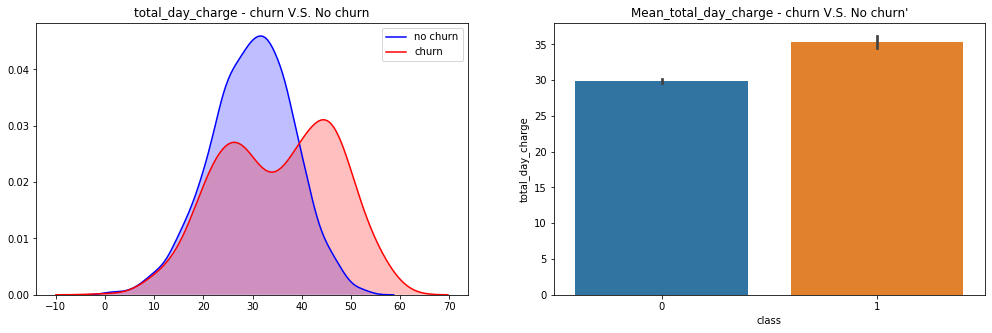

In [163]:
fig = plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
ax=sns.kdeplot (churn_df.loc[(churn_df['class'] == 0),'total_day_charge'] , color='b',shade=True, label='no churn')
ax=sns.kdeplot(churn_df.loc[(churn_df['class'] == 1),'total_day_charge'] , color='r',shade=True, label='churn')
plt.title('total_day_charge - churn V.S. No churn')
plt.subplot(1,2,2)
sns.barplot(x="class", y="total_day_charge", data= churn_df)
plt.title("Mean_total_day_charge - churn V.S. No churn'")

**Observation:** 
A bi-modal distribution for customers that churned 
1. Customers who had less total_day_charge (~25 or less) left the company 
2. Customers who had too much total_day_charge (~45 or more) left the company 
3. Customers who left generally were moderate or Excessive user.

### Split Train/Test Set

Let's split our data into a train and test set. We'll fit our model with the train set and leave our test set for our last evaluation. Stratify sampling is used to deal with class imbalance.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(churn_df_features,churn_target,test_size=0.20, random_state=123, 
                                                    stratify=churn_target)

### Resample Methods

Let's train a base logistic regression model on the three types of samples to see which yields the best result:
1. **Orginal Sample**
2. **Upsampling Data**
3. **Downsampling Data**

In [6]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE 

# Upsample minority class
X_train_u, y_train_u = resample(X_train[y_train == 1],
                                y_train[y_train == 1],
                                replace=True,
                                n_samples=X_train[y_train == 0].shape[0],
                                random_state=1)

X_train_u = np.concatenate((X_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))


# Upsample using SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)


# Downsample majority class
X_train_d, y_train_d = resample(X_train[y_train == 0],
                                y_train[y_train == 0],
                                replace=True,
                                n_samples=X_train[y_train == 1].shape[0],
                                random_state=1)
X_train_d = np.concatenate((X_train[y_train == 1], X_train_d))
y_train_d = np.concatenate((y_train[y_train == 1], y_train_d))


print("Original shape:", X_train.shape, y_train.shape)
print("Upsampled shape:", X_train_u.shape, y_train_u.shape)
print ("SMOTE sample shape:", x_train_sm.shape, y_train_sm.shape)
print("Downsampled shape:", X_train_d.shape, y_train_d.shape)

Original shape: (4000, 18) (4000,)
Upsampled shape: (6868, 18) (6868,)
SMOTE sample shape: (6868, 18) (6868,)
Downsampled shape: (1132, 18) (1132,)


**Objective:** Train our Logistic Regression Model to our original, upsampled, and downsampled data to see which performs best.

In [7]:
from sklearn.model_selection import cross_val_score
# Create the Original, Upsampled, and Downsampled training sets
methods_data = {"Original": (X_train, y_train),
                "Upsampled": (X_train_u, y_train_u),
                "SMOTE":(x_train_sm, y_train_sm),
                "Downsampled": (X_train_d, y_train_d)}

# Loop through each type of training sets and apply 5-Fold CV using Logistic Regression
# By default in cross_val_score StratifiedCV is used
for method in methods_data.keys():
    lr_results = cross_val_score(LogisticRegression(), methods_data[method][0], methods_data[method][1], cv=5, scoring='f1')
    print(f"The best F1 Score for {method} data:")
    print (lr_results.mean())

F:\Softwares\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Softwares\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Softwares\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Softwares\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Softwares\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

The best F1 Score for Original data:
0.27623388216137207


F:\Softwares\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Softwares\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Softwares\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Softwares\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Softwares\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

The best F1 Score for Upsampled data:
0.7740075019695147


F:\Softwares\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Softwares\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Softwares\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Softwares\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Softwares\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

The best F1 Score for SMOTE data:
0.7944373332857219


F:\Softwares\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Softwares\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Softwares\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Softwares\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Softwares\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

The best F1 Score for Downsampled data:
0.7580122246365271


**Observation:**
Train on Original, Upsampled, SMOTE, and Downsampled Data 

**Resut:**
- Original Sample: F1 Score 27.6%
- Upsample: F1 Score 77.%
- SMOTE: F1 Score 79.4%
- Downsample: F1 Score 75.8%

SMOTE gives us the best performance because SMOTE use the nearest neighbors of the minority observations to create new synthetic data

### Models Analysis
Four models have been used to study the effectiveness.

**Logistic Regression:**
Models the probability of the default class. The coefficients (Beta values b) of the logistic regression algorithm must be estimated from the training data

**Gradient Boosted:**
Produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

**Random Forest:**
Creates the forest with some number of trees.

**AdaBoost:**
It fits a sequence of weak learners on different weighted training data.


### Logistic Regression

In [8]:
lr = LogisticRegression()

# Fit the model to the Upsampling data
lr = lr.fit(x_train_sm, y_train_sm)

print ("Logistic Regression Model")
lr_auc = roc_auc_score(y_test, lr.predict(X_test))

print ("Logistic Regression AUC = %2.2f" % lr_auc)

print(classification_report(y_test, lr.predict(X_test)))
print(confusion_matrix(y_test,lr.predict(X_test)))

F:\Softwares\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Model
Logistic Regression AUC = 0.77
              precision    recall  f1-score   support

           0       0.95      0.78      0.86       859
           1       0.36      0.75      0.49       141

    accuracy                           0.78      1000
   macro avg       0.66      0.77      0.67      1000
weighted avg       0.87      0.78      0.81      1000

[[673 186]
 [ 35 106]]


### Gradient Boosted

In [9]:
gbc = GradientBoostingClassifier()  
gbc = gbc.fit(x_train_sm,y_train_sm)
print ("Gradient Boosting Model")
gbc_auc = roc_auc_score(y_test, gbc.predict(X_test))

print ("GradientBoosting AUC = %2.2f" % gbc_auc)

print(classification_report(y_test, gbc.predict(X_test)))
print(confusion_matrix(y_test,gbc.predict(X_test)))

Gradient Boosting Model
GradientBoosting AUC = 0.87
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       859
           1       0.78      0.77      0.77       141

    accuracy                           0.94      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.94      0.94      0.94      1000

[[829  30]
 [ 33 108]]


### Random Forest

In [10]:
rf = RandomForestClassifier()  
rf = rf.fit(x_train_sm,y_train_sm)
print ("Random Forest Model")
rf_auc = roc_auc_score(y_test, rf.predict(X_test))

print ("Random Forest AUC = %2.2f" % rf_auc)

print(classification_report(y_test,rf.predict(X_test)))
print(confusion_matrix(y_test,rf.predict(X_test)))

F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Model
Random Forest AUC = 0.87
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       859
           1       0.84      0.76      0.80       141

    accuracy                           0.95      1000
   macro avg       0.90      0.87      0.88      1000
weighted avg       0.94      0.95      0.94      1000

[[839  20]
 [ 34 107]]


In [21]:
ab =AdaBoostClassifier()  
ab =ab.fit(x_train_sm,y_train_sm)
print ("AdaBoost Model")
ab_auc = roc_auc_score(y_test, ab.predict(X_test))

print ("AdaBoost AUC = %2.2f" % ab_auc)

print(classification_report(y_test,ab.predict(X_test)))

AdaBoost Model
AdaBoost AUC = 0.73
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       859
           1       0.52      0.53      0.52       141

    accuracy                           0.86      1000
   macro avg       0.72      0.73      0.72      1000
weighted avg       0.87      0.86      0.86      1000



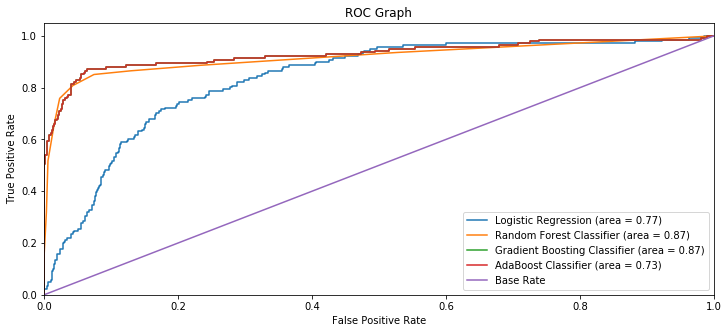

In [12]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])
ab_fpr, ab_tpr, ab_thresholds = roc_curve(y_test, ab.predict_proba(X_test)[:,1])


plt.figure(figsize=(12,5))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_auc)

# Plot Decision Tree ROC
plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting Classifier (area = %0.2f)' % gbc_auc)

# Plot AdaBoost ROC
plt.plot(gbc_fpr, gbc_tpr, label='AdaBoost Classifier (area = %0.2f)' % ab_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [13]:
model = GradientBoostingClassifier()
gb_grid_params = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [4, 5],
    'min_samples_leaf': [5, 7]
}

gs = GridSearchCV(model, gb_grid_params, cv=10, return_train_score=True)

gs.fit(x_train_sm, y_train_sm)
bestrf = gs.best_estimator_
bestrf

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [14]:
print("Mean cross-validated score of the best_estimator: ", gs.best_score_ )

Mean cross-validated score of the best_estimator:  0.9711706464764124


In [34]:
# Random Forest Model
rf = RandomForestClassifier(max_depth=5,  min_samples_leaf=5, max_features=0.65)

# fit the model on your training data
rf.fit(x_train_sm, y_train_sm)



F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=0.65, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
X_train.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
4690,23,138,0,0,0,54.8,123,9.32,147.5,76,12.54,173.6,119,7.81,11.5,1,3.11,1
2518,18,53,0,0,0,145.1,116,24.67,233.7,82,19.86,208.7,95,9.39,7.9,5,2.13,2
2777,48,20,0,0,0,186.8,89,31.76,253.4,51,21.54,273.1,105,12.29,12.3,6,3.32,2
2526,31,57,1,0,0,115.0,65,19.55,122.3,96,10.40,245.0,75,11.03,6.4,1,1.73,0
1106,27,86,0,0,0,190.5,115,32.39,179.6,130,15.27,258.5,89,11.63,10.1,5,2.73,3


In [41]:
x_train_sm=pd.DataFrame(x_train_sm)

In [42]:
x_train_sm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,23.0,138.0,0.0,0.0,0.0,54.8,123.0,9.32,147.5,76.0,12.54,173.6,119.0,7.81,11.5,1.0,3.11,1.0
1,18.0,53.0,0.0,0.0,0.0,145.1,116.0,24.67,233.7,82.0,19.86,208.7,95.0,9.39,7.9,5.0,2.13,2.0
2,48.0,20.0,0.0,0.0,0.0,186.8,89.0,31.76,253.4,51.0,21.54,273.1,105.0,12.29,12.3,6.0,3.32,2.0
3,31.0,57.0,1.0,0.0,0.0,115.0,65.0,19.55,122.3,96.0,10.40,245.0,75.0,11.03,6.4,1.0,1.73,0.0
4,27.0,86.0,0.0,0.0,0.0,190.5,115.0,32.39,179.6,130.0,15.27,258.5,89.0,11.63,10.1,5.0,2.73,3.0


In [45]:
for col in X_train.columns:
    print(col)

state
account_length
international_plan
voice_mail_plan
number_vmail_messages
total_day_minutes
total_day_calls
total_day_charge
total_eve_minutes
total_eve_calls
total_eve_charge
total_night_minutes
total_night_calls
total_night_charge
total_intl_minutes
total_intl_calls
total_intl_charge
number_customer_service_calls


In [50]:
x_train_sm.columns=["state", "account_length", "international_plan", "voice_mail_plan", "number_vmail_messages", "total_day_minutes",
"total_day_calls", "total_day_charge", "total_eve_minutes", "total_eve_calls", "total_eve_charge", "total_night_minutes", "total_night_calls",
"total_night_charge","total_intl_minutes","total_intl_calls","total_intl_charge","number_customer_service_calls"]

state                            0.000174
account_length                   0.000064
international_plan               0.293322
voice_mail_plan                  0.058657
number_vmail_messages            0.008962
total_day_minutes                0.154693
total_day_calls                  0.000287
total_day_charge                 0.123757
total_eve_minutes                0.036122
total_eve_calls                  0.000649
total_eve_charge                 0.034486
total_night_minutes              0.005925
total_night_calls                0.000170
total_night_charge               0.001934
total_intl_minutes               0.005496
total_intl_calls                 0.030140
total_intl_charge                0.015038
number_customer_service_calls    0.230125
dtype: float64


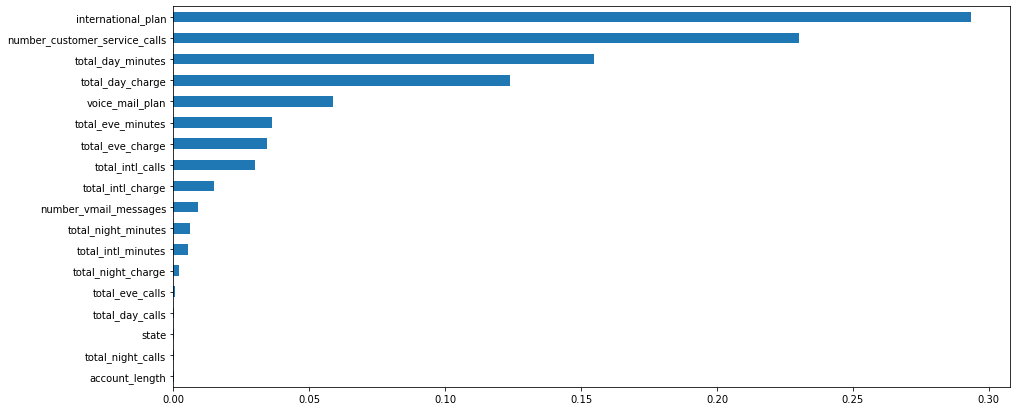

In [51]:
feature_importances = pd.Series(rf.feature_importances_, index=x_train_sm.columns)
print(feature_importances)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh', figsize=(15,7))

F:\Softwares\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


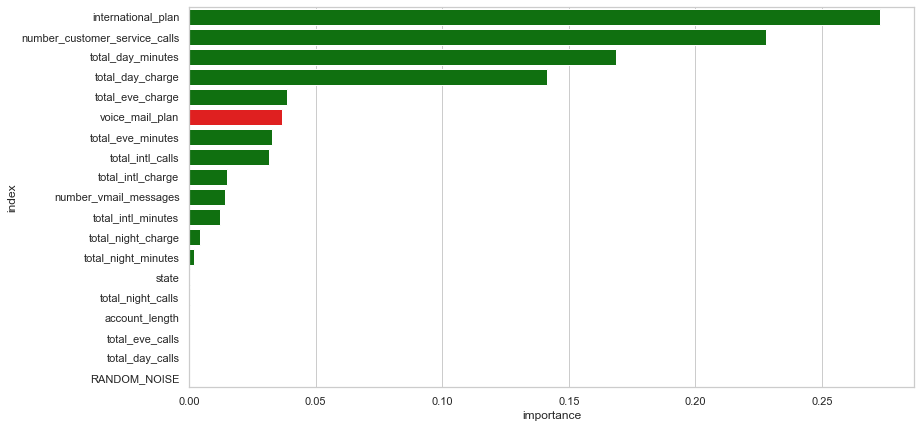

In [54]:
# Apply Random Noise to data set
x_train_sm_rnoise =  pd.DataFrame(x_train_sm)
x_train_sm_rnoise['RANDOM_NOISE'] = np.random.normal(0, 1, x_train_sm_rnoise.shape[0])

# Fit Random Forest to DataSet
rf_random = RandomForestClassifier(max_depth=5,  min_samples_leaf=5, max_features=0.65)
rf_random = rf_random.fit(x_train_sm_rnoise, y_train_sm)


# Get Feature Importances
feature_importances_random = pd.DataFrame(rf_random.feature_importances_, index = x_train_sm_rnoise.columns,columns=['importance']).sort_values('importance', ascending=False)
feature_importances_random = feature_importances_random.reset_index()

# Create Seaborn PLot
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))


clrs = ['red' if (x == 5 ) else 'green' for x in feature_importances_random.index.values ]

# Plot the Feature Importance
sns.barplot(x="importance", y='index', data=feature_importances_random,
            label="Total",  palette=clrs)

**Observation**:
According to the feature importance analysis produced by the Gradient Boosting algorithm, the following features had the highest predictive power:

- international_plan
- number_customer_service_calls
- total_day_minutes
- total_day_charge
- total_eve_charge

### Conclusion
The model did a good job of predicting churn. Among all the models built, Gradient Boosted Classifier produced the highest AUC and the following scores:

- Accuracy: 94% labeled correctly
- Precision: 78% labeled as churn actually churned (3% were wrongly labeled as churn)
- Recall: 77% that actually churned were labeled as churn (23% of churn users were labeled as non-churn)

### Retention Plan
Since this model is being used for people, we should refrain from soley relying on the output of our model. Instead, we can use it's probability output and design our own system to treat each customer accordingly. 

- Safe Zone (Green) – Customers within this zone are considered safe. 

- Low Risk Zone (Yellow) – Customers within this zone are too be taken into consideration of potential churn. This is more of a long-term track.

- Medium Risk Zone (Orange) – Customers within this zone are at risk of churn. Action should be taken and monitored accordingly. 
 
- High Risk Zone (Red) – Customers within this zone are considered to have the highest chance of churn. Action should be taken immediately. 

### Findings
- Binary Classification: Churn V.S. No Churn
- Instance Scoring: Likelihood of customer responding to an offer/incentive to save them from leaving.
- Need for Application: Save customers from leaving

In our customer retention problem, rather than simply predicting whether an customer will churn the company within a certain time frame, we would much rather have an estimate of the probability that he/she will leave the company. We would rank customers by their probability of leaving, then allocate a limited incentive budget to the highest probability instances. 

Consider customer churn domain where a customer is given treatment by customer services because they think the customer will leave the company within a month, but the customer actually does not. This is a false positive. This mistake could be expensive, inconvenient, and time consuming for both the customer services and customer, but is a good investment for relational growth.